In [44]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# Store filepaths in variables
new_results_file = "music_list_data/new_results.csv"
old_results_file = "music_list_data/old_results.csv"

In [46]:
# Read our data files with the pandas library
new_results_df = pd.read_csv(new_results_file)
old_results_df = pd.read_csv(old_results_file)

In [47]:
# Create a data frame with desired "old" data
old_final_df = old_results_df.loc[:,['artist', 'song','#_words', '#_big_words', 'big_avg_word_len']]
old_final_df.head()

,artist,song,#_words,#_big_words,big_avg_word_len
0,wu-tang clan,cream,679,256,5.121094
1,wu-tang clan,gravel pit,711,311,5.144695
2,wu-tang clan,triumph,1027,555,5.809009
3,wu-tang clan,bring da ruckus,616,225,5.466667
4,wu-tang clan,protect ya neck,66,26,4.692308


In [48]:
# Create a data frame with desired "new" data
new_final_df = new_results_df.loc[:,['artist', 'song','#_words', '#_big_words', 'big_avg_word_len']]
new_final_df.head()

,artist,song,#_words,#_big_words,big_avg_word_len
0,21 savage,bank account,616,158,4.930380
1,21 savage,no heart,598,180,5.005556
2,21 savage,x,588,146,5.068493
3,21 savage,red opps,448,101,4.376238
4,21 savage,issa,589,237,5.067511


In [49]:
# Aggregate data by artist to find mean values, and create column to label artist by genre
old_agg_df = old_final_df.groupby('artist').agg({"#_words" : "mean", 
                                                  "#_big_words" : "mean",
                                                  "big_avg_word_len" : "mean"})
old_agg_df = old_agg_df.reset_index()
old_agg_df['Rap Genre'] = '90\'s Rap'
old_agg_df.head()

,artist,#_words,#_big_words,big_avg_word_len,Rap Genre
0,2pac,663.400000,210.400000,5.063684,90's Rap
1,a tribe called quest,670.000000,240.600000,5.154719,90's Rap
2,bone thugs n harmony,792.750000,241.750000,5.015343,90's Rap
3,dr dre,672.666667,224.166667,5.059379,90's Rap
4,eminem,887.000000,264.400000,5.186498,90's Rap


In [50]:
# Aggregate data by artist to find mean values, and create column to label artist by genre
new_agg_df = new_final_df.groupby('artist').agg({"#_words" : "mean", 
                                                  "#_big_words" : "mean",
                                                  "big_avg_word_len" : "mean"})
new_agg_df = new_agg_df.reset_index()
new_agg_df['Rap Genre'] = 'Mumble Rap'
new_agg_df.head()

,artist,#_words,#_big_words,big_avg_word_len,Rap Genre
0,21 savage,567.8,164.4,4.889635,Mumble Rap
1,desiigner,598.6,118.6,4.894941,Mumble Rap
2,fetty wap,520.0,122.4,4.836354,Mumble Rap
3,future,663.6,149.2,5.090932,Mumble Rap
4,kodak black,622.8,137.2,4.997953,Mumble Rap


In [51]:
# Concatenate "old" and "new" aggrated data frames
all_results_df = pd.concat([old_agg_df, new_agg_df])
all_results_df.head()

,artist,#_words,#_big_words,big_avg_word_len,Rap Genre
0,2pac,663.400000,210.400000,5.063684,90's Rap
1,a tribe called quest,670.000000,240.600000,5.154719,90's Rap
2,bone thugs n harmony,792.750000,241.750000,5.015343,90's Rap
3,dr dre,672.666667,224.166667,5.059379,90's Rap
4,eminem,887.000000,264.400000,5.186498,90's Rap


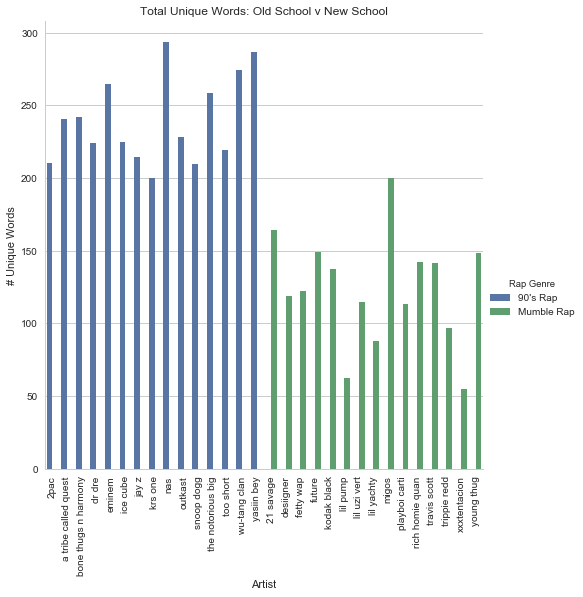

In [52]:
# Create a bar graph to show number of unique uncommon words by artist
sns.set_style("whitegrid")
axa = sns.factorplot(x="artist", y="#_big_words", hue="Rap Genre", data=all_results_df, kind='bar', size=7)
axa.set_xticklabels(rotation=90)
# Set title, x-axis label, y-axis label.
plt.title('Total Unique Words: Old School v New School')
plt.ylabel('# Unique Words')
plt.xlabel('Artist')
plt.savefig('images/old_v_new.png')
plt.show()

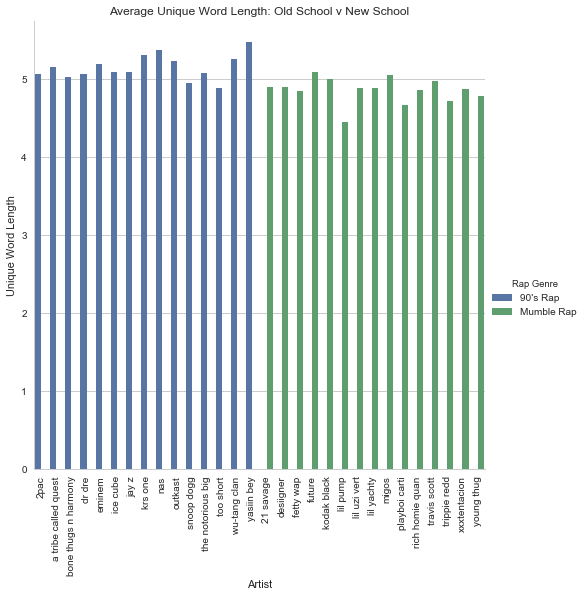

In [53]:
# Create a bar graph to show average length of unique uncommon words by artist
sns.set_style("whitegrid")
axa = sns.factorplot(x="artist", y="big_avg_word_len", hue="Rap Genre", data=all_results_df, kind='bar', size=7)
axa.set_xticklabels(rotation=90)
# Set title, x-axis label, y-axis label.
plt.title('Average Unique Word Length: Old School v New School')
plt.ylabel('Unique Word Length')
plt.xlabel('Artist')
plt.savefig('images/old_v_new_length.png')
plt.show()